## Información de autos

La data contiene información de autos originalmente utilizada en la libreria StatLib. El archivo original se puede encontrar en https://archive.ics.uci.edu/dataset/9/auto+mpg

Algunas preguntas:
- ¿Cuáles son las marcas de autos que construyen autos más rápidos?
- ¿Cuáles son las marcas de autos que construyen autos mas económicos en gasto de combustible?
- ¿Existe alguna relación entre el consumo de combustible y el peso?
 

Documentación.
<table>
<tr><td>Columna</td><td>Descripción</td><td>Tipo</td></tr>

<tr><td>mpg</td><td>Consumo de combustible en millas por galon</td><td>Numérica y continua</td></tr>
<tr><td>cylinders</td><td>Cantidad de cilindros</td><td>Numérica y discreta</td></tr>
<tr><td>displacement</td><td>Desplazamiento del motor</td><td>Numérica y continua</td></tr>
<tr><td>horsepower</td><td>Fuerza del motor</td><td>Numérica y continua</td></tr>
<tr><td>weight</td><td>Peso en Kg.</td><td>Numérica y continua</td></tr>
<tr><td>acceleration</td><td>Aceleracion de 0 a 60 mph</td><td>Numérica y continua</td></tr>
<tr><td>model year</td><td>Año del modelo</td><td>Numérica y discreta</td></tr>
<tr><td>origin</td><td>Tipo de origen</td><td>Categorica y discreta</td></tr>
<tr><td>brand</td><td>Marca del auto</td><td>Categorica y discreta</td></tr>
<tr><td>model</td><td>Modelo del auto</td><td>Texto</td></tr>
</table>

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
url = 'https://drive.google.com/file/d/1PKNAVdZeRYgbMo_KFQQ4bs5JXnFX8Tu6/view?usp=drive_link'
#print(url.split('/')[-2])
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
#print(path)

df_autos = pd.read_csv(path, sep=',')
df_autos.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
215,13.0,8,318.0,150,3755,14.0,76,1,dodge,d100
329,44.6,4,91.0,67,1850,13.8,80,3,honda,civic 1500 gl
136,16.0,8,302.0,140,4141,14.0,74,1,ford,gran torino
207,20.0,4,130.0,102,3150,15.7,76,2,volvo,245
339,26.6,4,151.0,84,2635,16.4,81,1,buick,skylark
157,15.0,8,350.0,145,4440,14.0,75,1,chevrolet,bel air
284,20.6,6,225.0,110,3360,16.6,79,1,dodge,aspen 6
264,18.1,8,302.0,139,3205,11.2,78,1,ford,futura
297,25.4,5,183.0,77,3530,20.1,79,2,mercedes,benz 300d
38,14.0,8,350.0,165,4209,12.0,71,1,chevrolet,impala


In [3]:
df_autos.query("horsepower=='?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
32,25.0,4,98.0,?,2046,19.0,71,1,ford,pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford,maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault,lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford,mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault,18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc,concord dl


In [4]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   brand         398 non-null    object 
 9   model         396 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 31.2+ KB


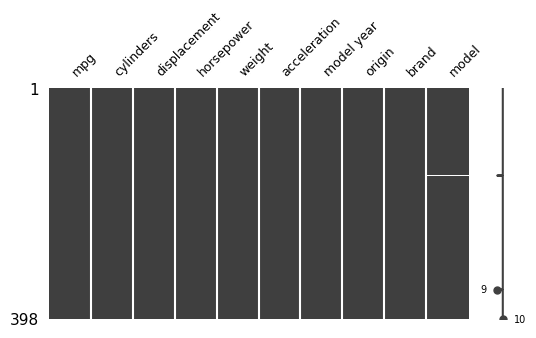

In [5]:
msno.matrix(df_autos, figsize=(6,3), fontsize=9)
plt.show()

## Tratamiento de datos

In [6]:
import numpy as np
df_autos.dropna(subset=['model'], inplace=True)
df_autos.shape
df_autos['origin'].replace({1:'USA',2:'Europe',3:'Japan'},inplace=True)
df_autos['brand'].replace({'mercedes':'mercedes-benz','vokswagen':'volkswagen',
                           'vw':'volkswagen','maxda':'mazda','toyouta':'toyota',
                           'chevroelt':'chevrolet'},inplace=True)
df_autos['horsepower'].replace({'?':np.nan},inplace=True)
df_autos.dropna(subset=['horsepower'], inplace=True)
df_autos['horsepower'] = df_autos['horsepower'].astype('int')

In [7]:
df_autos.groupby(['origin','brand']).agg({'model':'count'}).reset_index()

,origin,brand,model
0,Europe,audi,7
1,Europe,bmw,2
2,Europe,fiat,8
3,Europe,mercedes-benz,3
4,Europe,opel,4
5,Europe,peugeot,8
6,Europe,renault,3
7,Europe,saab,4
8,Europe,triumph,1
9,Europe,volkswagen,22


In [8]:
df_autos[['cylinders','acceleration']]

,cylinders,acceleration
0,8,12.0
1,8,11.5
2,8,11.0
3,8,12.0
4,8,10.5
...,...,...
393,4,15.6
394,4,24.6
395,4,11.6
396,4,18.6


In [9]:
df_plot = df_autos.groupby(['cylinders']).agg({'acceleration':'mean'}).reset_index()
df_plot

,cylinders,acceleration
0,3,13.250000
1,4,16.581218
2,5,18.633333
3,6,16.254217
4,8,12.955340


In [10]:
df_autos.query("cylinders==4")['acceleration'].sample(50)

56     20.5
246    19.4
146    14.5
378    14.7
323    14.4
338    15.7
320    15.0
14     15.0
312    16.4
198    17.4
175    14.0
294    15.2
57     15.5
375    15.3
349    16.0
293    14.0
282    17.3
81     17.0
209    21.9
76     14.5
301    13.2
60     19.5
348    17.3
217    14.8
273    14.9
177    15.0
315    20.1
332    15.3
53     19.0
143    14.5
118    15.5
235    18.2
114    15.5
324    19.2
141    16.5
195    22.2
61     16.5
131    21.0
59     23.5
248    16.4
49     14.0
371    16.0
147    15.5
313    16.5
102    21.0
279    16.6
272    17.6
79     18.0
376    18.2
343    16.9
Name: acceleration, dtype: float64

In [11]:
import plotly.express as px

#fig = px.line(df_autos, x="cylinders", y="acceleration", title='Acceleration by cylinders')
df_plot = df_autos.groupby(['cylinders']).agg({'acceleration':'mean'}).reset_index()
fig = px.bar(df_plot, x='cylinders', y='acceleration')
fig.show()

In [12]:
import plotly.express as px

#fig = px.line(df_autos, x="cylinders", y="acceleration", title='Acceleration by cylinders')
df_plot = df_autos.groupby(['cylinders','origin']).agg({'acceleration':'mean'}).reset_index()
fig = px.bar(df_plot, x='cylinders', y='acceleration', color='origin', barmode='group')
fig.show()

In [13]:
fig = px.scatter(df_autos, x="cylinders", y="acceleration", color='origin')
fig.show()

In [14]:
#num_cols=['mpg','displacement','horsepower','weight','acceleration']
fig = px.box(df_autos, x="cylinders", y="acceleration", color='origin')
fig.show()

In [15]:
fig = px.scatter(df_autos, x="horsepower", y="displacement", color='origin')
fig.show()